In [26]:
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as stats 
from scipy.stats import norm


## Verinin okunmasi
p_pr = pd.read_csv('data_precise.txt',sep='\t')

p_pr.head()

,y,intercept,f1,f2,f3,f4
0,28.352789,1.0,0.384440,0.361043,1.952061,0.134687
1,23.516683,1.0,0.460945,1.707639,1.438895,1.729922
2,24.175982,1.0,0.230274,0.315576,1.622533,1.598517
3,26.698449,1.0,0.606996,0.008059,1.155175,0.319348
4,19.363347,1.0,0.923288,0.691859,0.291822,0.601475


In [27]:
print(p_pr)

             y  intercept        f1        f2        f3        f4
0    28.352789        1.0  0.384440  0.361043  1.952061  0.134687
1    23.516683        1.0  0.460945  1.707639  1.438895  1.729922
2    24.175982        1.0  0.230274  0.315576  1.622533  1.598517
3    26.698449        1.0  0.606996  0.008059  1.155175  0.319348
4    19.363347        1.0  0.923288  0.691859  0.291822  0.601475
..         ...        ...       ...       ...       ...       ...
121  22.560356        1.0  0.382293  0.345748  1.160115  1.574378
122  28.797065        1.0  0.544958  1.441596  2.237176  0.036591
123  31.777135        1.0  0.562536  1.038189  2.500460  0.731411
124  31.852793        1.0  0.605285  1.536747  2.586106  0.976471
125  21.546856        1.0  0.951451  1.386723  0.351034  0.595900

[126 rows x 6 columns]


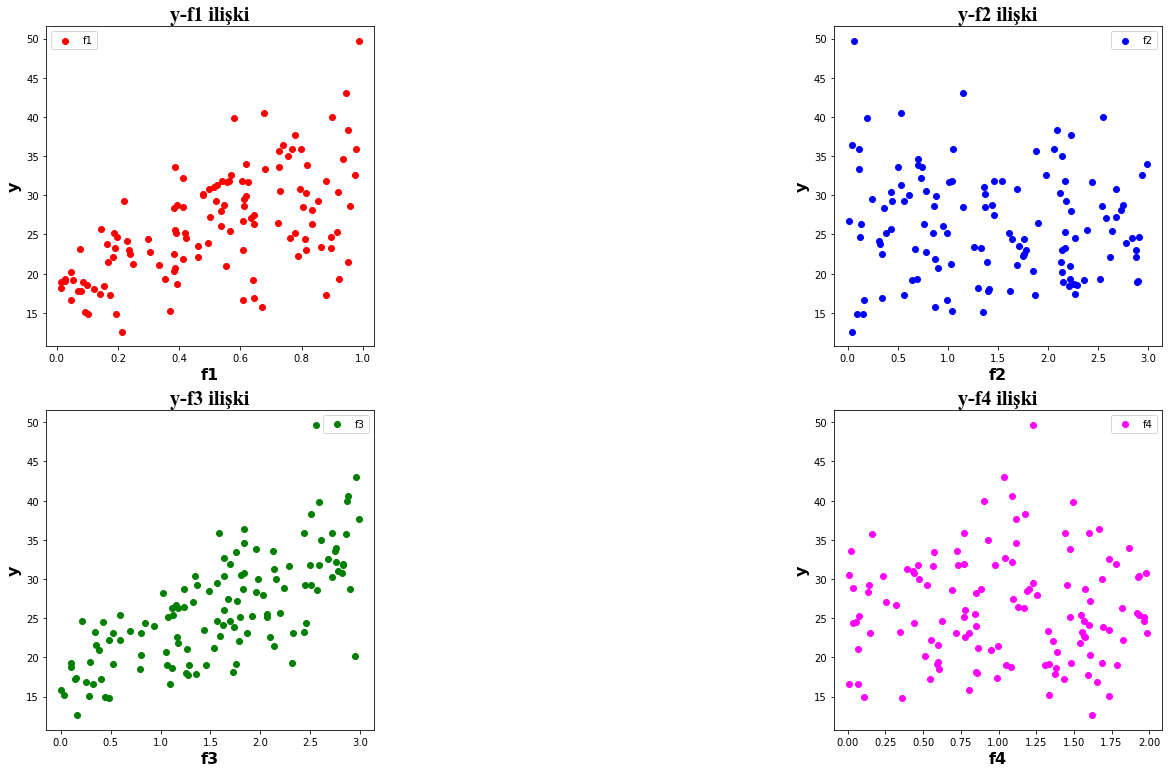

In [28]:
plt.subplots(figsize=(20, 20))
plt.subplot(3,3,1)
plt.scatter(p_pr['f1'],p_pr['y'], color='red', label= 'f1')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel("f1")
plt.ylabel("y")
plt.title("y-f1 ilişki", fontname="Times New Roman", fontweight="bold", fontsize = 20)
plt.legend()


plt.subplot(3,3,3)
plt.scatter(p_pr['f2'], p_pr['y'], color='blue', label= 'f2')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel("f2")
plt.ylabel("y")
plt.title("y-f2 ilişki", fontname="Times New Roman", fontweight="bold", fontsize = 20)
plt.legend()


plt.subplot(3,3,4)
plt.scatter(p_pr['f3'], p_pr['y'], color='green', label= 'f3')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel("f3")
plt.ylabel("y")
plt.title("y-f3 ilişki", fontname="Times New Roman", fontweight="bold", fontsize = 20)
plt.legend()

plt.subplot(3,3,6)
plt.scatter(p_pr['f4'], p_pr['y'], color='magenta', label= 'f4')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel("f4")
plt.ylabel("y")
plt.title("y-f4 ilişki", fontname="Times New Roman", fontweight="bold", fontsize = 20)
plt.legend()
plt.show()





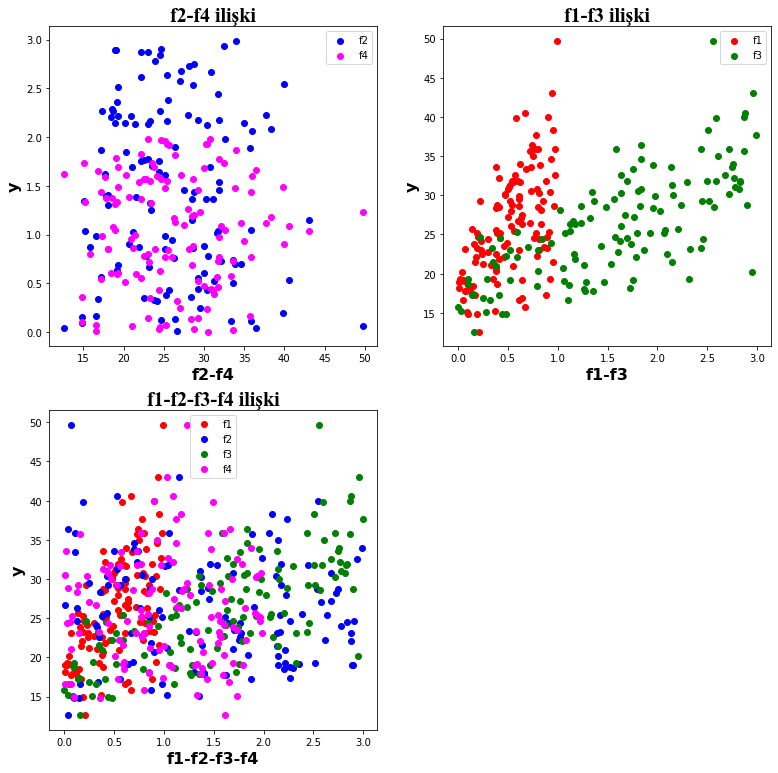

In [29]:
plt.subplots(figsize=(20, 20))
plt.subplot(3,3,5)
plt.scatter(p_pr['f1'], p_pr['y'],color='red', label= 'f1')
plt.scatter(p_pr['f2'], p_pr['y'], color='blue', label= 'f2')
plt.scatter(p_pr['f3'], p_pr['y'], color='green', label= 'f3')
plt.scatter(p_pr['f4'], p_pr['y'], color='magenta', label= 'f4')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel("f1-f2-f3-f4")
plt.ylabel("y")
plt.title("f1-f2-f3-f4 ilişki", fontname="Times New Roman", fontweight="bold", fontsize = 20)
plt.legend()


plt.subplot(3,3,2)
plt.scatter(p_pr['y'],p_pr['f2'], color='blue', label= 'f2')
plt.scatter(p_pr['y'],p_pr['f4'], color='magenta', label= 'f4')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel("f2-f4")
plt.ylabel("y")
plt.title("f2-f4 ilişki", fontname="Times New Roman", fontweight="bold", fontsize = 20)
plt.legend()

plt.subplot(3,3,3)
plt.scatter(p_pr['f1'], p_pr['y'], color='red', label= 'f1')
plt.scatter(p_pr['f3'], p_pr['y'], color='green', label= 'f3')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel("f1-f3")
plt.ylabel("y")
plt.title("f1-f3 ilişki", fontname="Times New Roman", fontweight="bold", fontsize = 20)
plt.legend()






Y ile f1 ve f3 fonksiyonları arasında korelasyon mevcuttur.

Grafiklerde f1 ve f3 değişkenlerinin değerleri arttıkça y değerleri de artmaktadır

## 2. Adım

In [30]:
p_pr['f1xf1'] = p_pr['f1']**2
p_pr['f2xf2'] = p_pr['f2']**2
p_pr['f1xf2'] = p_pr['f1'] * p_pr['f2']
p_pr['f1xf3'] = p_pr['f1'] * p_pr['f3']
p_pr['f3xf4'] = p_pr['f3'] * p_pr['f4']
p_pr['f2xf3'] = p_pr['f2'] * p_pr['f3']
p_pr['f2xf4'] = p_pr['f2'] * p_pr['f4']
p_pr['f1xf4'] = p_pr['f1'] * p_pr['f4']
p_pr['e_f1'] = np.exp(p_pr['f1'])
p_pr['e_f1xf3'] = np.exp(p_pr['f1xf3'])
p_pr['e_f4'] = np.exp(p_pr['f4'])


In [31]:
#p_prp_pr =p_pr.drop(columns ="e**f1")
#p_pr =p_pr.drop(columns ="e**f1xf2")
#p_pr =p_pr.drop(columns ="e**f1xf3")
#p_pr =p_pr.drop(columns ="e**f4")
p_pr.columns



Index(['y', 'intercept', 'f1', 'f2', 'f3', 'f4', 'f1xf1', 'f2xf2', 'f1xf2',
       'f1xf3', 'f3xf4', 'f2xf3', 'f2xf4', 'f1xf4', 'e_f1', 'e_f1xf3', 'e_f4'],
      dtype='object')

In [32]:
p_pr

,y,intercept,f1,f2,f3,f4,f1xf1,f2xf2,f1xf2,f1xf3,f3xf4,f2xf3,f2xf4,f1xf4,e_f1,e_f1xf3,e_f4
0,28.352789,1.0,0.384440,0.361043,1.952061,0.134687,0.147794,0.130352,0.138799,0.750451,0.262918,0.704777,0.048628,0.051779,1.468792,2.117954,1.144179
1,23.516683,1.0,0.460945,1.707639,1.438895,1.729922,0.212471,2.916033,0.787128,0.663252,2.489177,2.457114,2.954084,0.797400,1.585572,1.941094,5.640217
2,24.175982,1.0,0.230274,0.315576,1.622533,1.598517,0.053026,0.099588,0.072669,0.373627,2.593647,0.512032,0.504453,0.368097,1.258945,1.452995,4.945695
3,26.698449,1.0,0.606996,0.008059,1.155175,0.319348,0.368444,0.000065,0.004892,0.701186,0.368903,0.009309,0.002574,0.193843,1.834911,2.016143,1.376230
4,19.363347,1.0,0.923288,0.691859,0.291822,0.601475,0.852460,0.478669,0.638785,0.269436,0.175524,0.201900,0.416136,0.555334,2.517553,1.309225,1.824809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,22.560356,1.0,0.382293,0.345748,1.160115,1.574378,0.146148,0.119542,0.132177,0.443504,1.826460,0.401108,0.544339,0.601874,1.465641,1.558157,4.827739
122,28.797065,1.0,0.544958,1.441596,2.237176,0.036591,0.296979,2.078199,0.785609,1.219167,0.081861,3.225104,0.052750,0.019941,1.724536,3.384367,1.037269
123,31.777135,1.0,0.562536,1.038189,2.500460,0.731411,0.316447,1.077836,0.584019,1.406600,1.828864,2.595949,0.759343,0.411445,1.755119,4.082051,2.078011
124,31.852793,1.0,0.605285,1.536747,2.586106,0.976471,0.366370,2.361593,0.930170,1.565330,2.525258,3.974191,1.500590,0.591043,1.831774,4.784256,2.655071


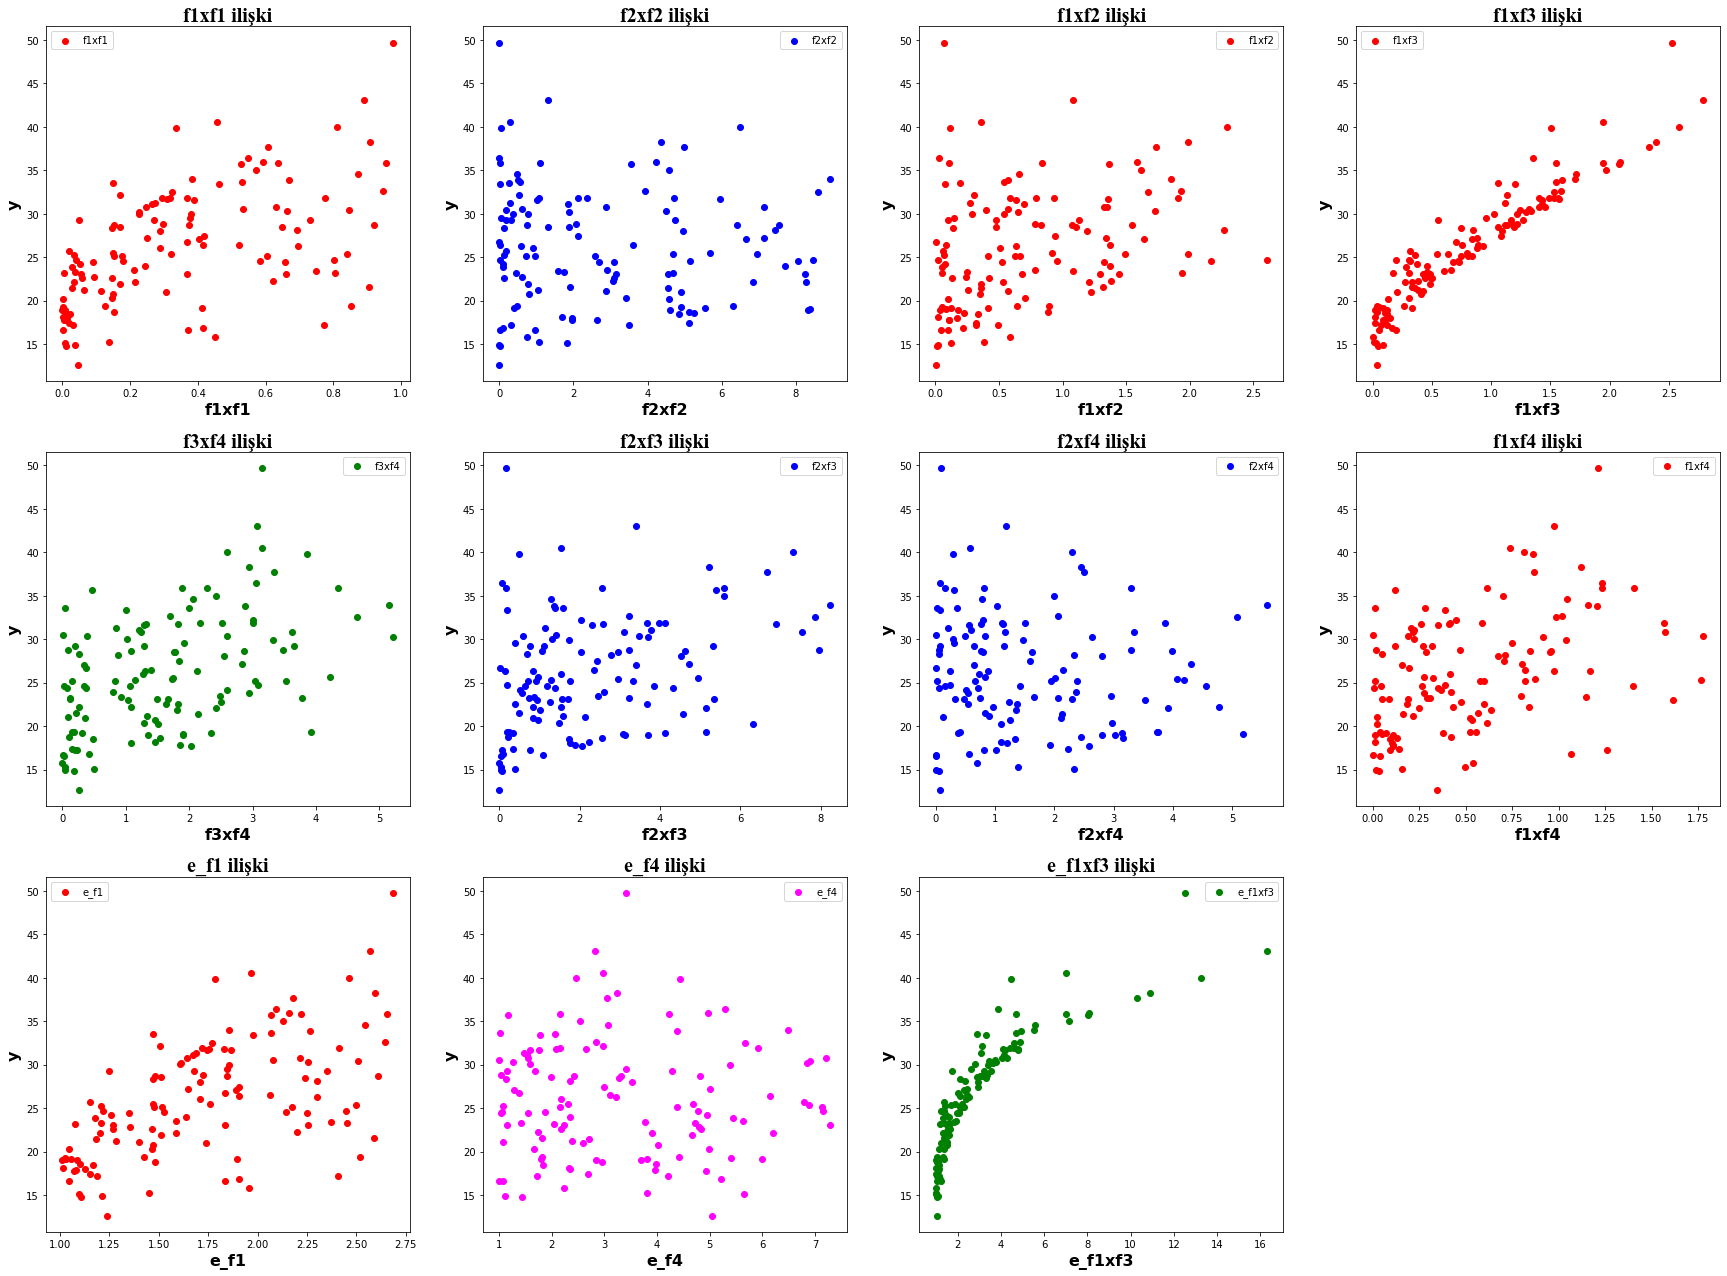

In [33]:
plt.subplots(figsize=(30, 30))
plt.subplot(4,4,1)
plt.scatter(p_pr['f1xf1'], p_pr['y'], color= 'red', label='f1xf1')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f1xf1')
plt.ylabel('y')
plt.title('f1xf1 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()


plt.subplot(4,4,2)
plt.scatter(p_pr['f2xf2'], p_pr['y'], color= 'blue', label='f2xf2')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f2xf2')
plt.ylabel('y')
plt.title('f2xf2 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()

plt.subplot(4,4,3)
plt.scatter(p_pr['f1xf2'], p_pr['y'], color= 'red', label='f1xf2')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f1xf2')
plt.ylabel('y')
plt.title('f1xf2 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()

plt.subplot(4,4,4)
plt.scatter(p_pr['f1xf3'], p_pr['y'], color= 'red', label='f1xf3')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f1xf3')
plt.title('f1xf3 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.ylabel('y')
plt.legend()

plt.subplot(4,4,5)
plt.scatter(p_pr['f3xf4'], p_pr['y'], color= 'green', label='f3xf4')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f3xf4')
plt.ylabel('y')
plt.title('f3xf4 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()

plt.subplot(4,4,6)
plt.scatter(p_pr['f2xf3'], p_pr['y'], color= 'blue', label='f2xf3')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f2xf3')
plt.ylabel('y')
plt.title('f2xf3 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()

plt.subplot(4,4,7)
plt.scatter(p_pr['f2xf4'], p_pr['y'], color= 'blue', label='f2xf4')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f2xf4')
plt.title('f2xf4 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.ylabel('y')
plt.legend()

plt.subplot(4,4,8)
plt.scatter(p_pr['f1xf4'], p_pr['y'], color= 'red', label='f1xf4')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f1xf4')
plt.ylabel('y')
plt.title('f1xf4 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()

plt.subplot(4,4,9)
plt.scatter(p_pr['e_f1'], p_pr['y'], color= 'red', label='e_f1')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('e_f1')
plt.ylabel('y')
plt.title('e_f1 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()

plt.subplot(4,4,10)
plt.scatter(p_pr['e_f4'], p_pr['y'], color= 'magenta', label='e_f4')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('e_f4')
plt.ylabel('y')
plt.title('e_f4 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()

plt.subplot(4,4,11)
plt.scatter(p_pr['e_f1xf3'], p_pr['y'], color= 'green', label='e_f1xf3')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('e_f1xf3')
plt.ylabel('y')
plt.title('e_f1xf3 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()




Değişikler yapıldıktan sonra, (f1xf1),(f1xf2),(f1xf3),(e_f1xf3),(f2xf3),(f3xf4) 6 adet öznitelik eklenmiştir.
Burada f1xf3 ve e_(f1xf3) y değreleri ile korelasyona sahip oldukları görülmüştür. 

Denklem ==>  
$$
y = f1.x1 + f2.x2 + f3.x3 + f4.x4 + (f1.f1).x5 + (f1.f2).x6 + (f1.f3).x7 + (e_f1.f3).x8 + (f2.f3).x9 + (f3.f4).x10
$$
Fonksiyonda kullanılan yeni özniteliklere ait grafikler aşağıda yeniden gösterilmiştir. 

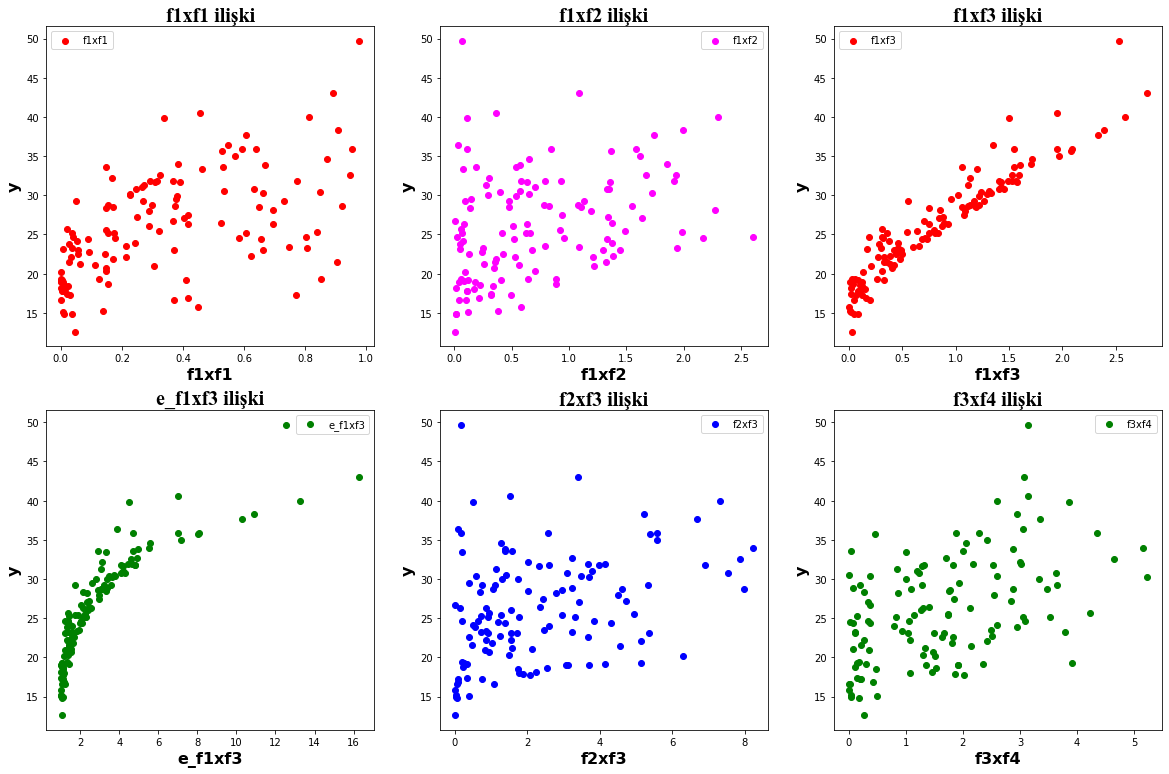

In [34]:
plt.subplots(figsize=(20, 20))
plt.subplot(3,3,1)
plt.scatter(p_pr['f1xf1'], p_pr['y'], color= 'red', label='f1xf1')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f1xf1')
plt.ylabel('y')
plt.title('f1xf1 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()

plt.subplot(3,3,2)
plt.scatter(p_pr['f1xf2'], p_pr['y'], color= 'magenta', label='f1xf2')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f1xf2')
plt.ylabel('y')
plt.title('f1xf2 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()

plt.subplot(3,3,3)
plt.scatter(p_pr['f1xf3'], p_pr['y'], color= 'red', label='f1xf3')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f1xf3')
plt.title('f1xf3 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.ylabel('y')
plt.legend()

plt.subplot(3,3,4)
plt.scatter(p_pr['e_f1xf3'], p_pr['y'], color= 'green', label='e_f1xf3')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('e_f1xf3')
plt.ylabel('y')
plt.title('e_f1xf3 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()

plt.subplot(3,3,5)
plt.scatter(p_pr['f2xf3'], p_pr['y'], color= 'blue', label='f2xf3')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f2xf3')
plt.ylabel('y')
plt.title('f2xf3 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()

plt.subplot(3,3,6)
plt.scatter(p_pr['f3xf4'], p_pr['y'], color= 'green', label='f3xf4')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.xlabel('f3xf4')
plt.ylabel('y')
plt.title('f3xf4 ilişki', fontname='Times New Roman', fontweight='bold', fontsize=20)
plt.legend()



Denklem ==>  
$$
y = \beta_0 + f1.\beta_1 + f2.\beta_2 + f3.\beta_3 + f4.\beta_4 + (f1.f1).\beta_5 + (f1.f2).\beta_6 + (f1.f3).\beta_7 + (e f1.f3).\beta_8 + (f2.f3).\beta_9 + (f3.f4).\beta10
$$

$$
y = \beta_0 + f1.\beta_1 + f2.\beta_2 + f3.\beta_3 + f4.\beta_4 + f5.\beta_5 + f6.\beta_6 + f7.\beta_7 + f8.\beta_8 + f9.\beta_9 + f10.\beta10
$$



## 3. Adım

In [35]:
p2_pr = pd.DataFrame({
    'y':p_pr['y'],
    'intercept':np.ones_like(p_pr['y']),
    'f1':p_pr['f1'],
    'f2':p_pr['f2'],
    'f3':p_pr['f3'],
    'f4':p_pr['f4'],
    'f5':p_pr['f1xf1'],
    'f6':p_pr['f1xf2'],
    'f7':p_pr['f1xf3'],
    'f8':p_pr['e_f1xf3'],
    'f9':p_pr['f2xf3'],
    'f10':p_pr['f3xf4'],
})



X = p2_pr.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]].to_numpy()
y = p2_pr['y'].to_numpy().reshape(126,1)



In [36]:
np.shape(X)

(126, 11)

In [37]:
p2_pr

,y,intercept,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,28.352789,1.0,0.384440,0.361043,1.952061,0.134687,0.147794,0.138799,0.750451,2.117954,0.704777,0.262918
1,23.516683,1.0,0.460945,1.707639,1.438895,1.729922,0.212471,0.787128,0.663252,1.941094,2.457114,2.489177
2,24.175982,1.0,0.230274,0.315576,1.622533,1.598517,0.053026,0.072669,0.373627,1.452995,0.512032,2.593647
3,26.698449,1.0,0.606996,0.008059,1.155175,0.319348,0.368444,0.004892,0.701186,2.016143,0.009309,0.368903
4,19.363347,1.0,0.923288,0.691859,0.291822,0.601475,0.852460,0.638785,0.269436,1.309225,0.201900,0.175524
...,...,...,...,...,...,...,...,...,...,...,...,...
121,22.560356,1.0,0.382293,0.345748,1.160115,1.574378,0.146148,0.132177,0.443504,1.558157,0.401108,1.826460
122,28.797065,1.0,0.544958,1.441596,2.237176,0.036591,0.296979,0.785609,1.219167,3.384367,3.225104,0.081861
123,31.777135,1.0,0.562536,1.038189,2.500460,0.731411,0.316447,0.584019,1.406600,4.082051,2.595949,1.828864
124,31.852793,1.0,0.605285,1.536747,2.586106,0.976471,0.366370,0.930170,1.565330,4.784256,3.974191,2.525258


In [38]:
XX = np.dot(X.T, X)
yy = np.dot(X.T,y)

betas = np.linalg.solve(XX,yy)


In [39]:
betas

array([[10.40664183],
       [ 6.31249648],
       [ 2.84658572],
       [ 5.0309137 ],
       [-0.33344135],
       [-0.78904958],
       [-0.3327067 ],
       [ 6.12313091],
       [ 0.03259732],
       [-2.05611821],
       [ 0.53743725]])

In [40]:
modeled = np.dot(X, betas)



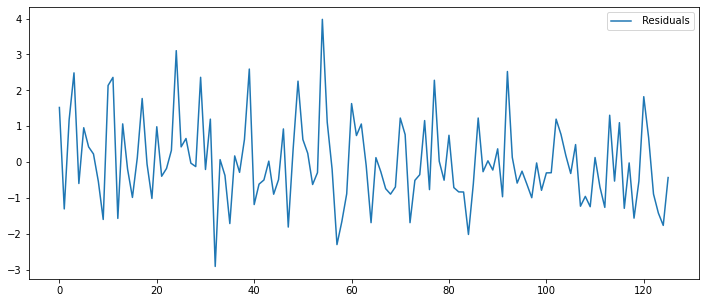

In [41]:
x = np.arange(0,len(X))

residuals = y - modeled
plt.figure(figsize=(12,5))
plt.plot(x , residuals, label = ' Residuals')
plt.legend()


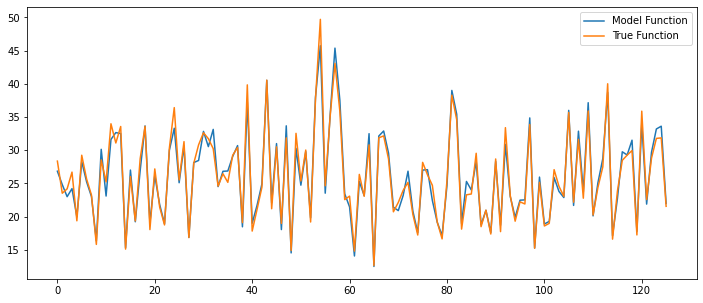

In [42]:
plt.figure(figsize=(12,5))
plt.plot(x,modeled, label='Model Function')
plt.plot(x,y, label='True Function')
plt.legend()

In [43]:
s_2_variance = np.sum(residuals**2)/(126-11)

In [44]:
from scipy.stats import t

for i in range(len(betas)):
    
    sigma_i = np.sqrt(s_2_variance*np.linalg.inv(np.dot(X.T,X))[i,i])
    
    t_i = (betas[i]-0)/sigma_i
    
    #p_val_i = (1.0-t.cdf(abs(t_i),126-11))*2
    
    p_val_i = 2 * (1 - t.cdf(abs(t_i),115))
    
    #p_val_i = stats.distributions.t.sf(np.abs(t_i),(126-11))   Denendi....
    
    print("t-value", t_i)
    print("p-value", p_val_i,"\n")
    
    if p_val_i <= 0.025:
        
        print('\tBetas {} katsayısı değeri sağlamıştır.'.format(i), '\n')
    
    



t-value [10.59218841]
p-value [0.] 

	Betas 0 katsayısı değeri sağlamıştır. 

t-value [2.54554885]
p-value [0.01223413] 

	Betas 1 katsayısı değeri sağlamıştır. 

t-value [8.0964385]
p-value [6.60360655e-13] 

	Betas 2 katsayısı değeri sağlamıştır. 

t-value [10.68203971]
p-value [0.] 

	Betas 3 katsayısı değeri sağlamıştır. 

t-value [-0.78401081]
p-value [0.43464563] 

t-value [-0.43201025]
p-value [0.66654289] 

t-value [-0.70651655]
p-value [0.48129598] 

t-value [6.72462521]
p-value [7.16437576e-10] 

	Betas 7 katsayısı değeri sağlamıştır. 

t-value [0.23306522]
p-value [0.81612508] 

t-value [-13.53626667]
p-value [0.] 

	Betas 9 katsayısı değeri sağlamıştır. 

t-value [2.162627]
p-value [0.0326406] 



In [45]:
import statsmodels.api as sm

mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())
print(res.pvalues)
print(res.tvalues)  ## P values hazır fonksiyonlar ile karşılaştırıldı.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     362.2
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           5.57e-82
Time:                        21:17:35   Log-Likelihood:                -200.40
No. Observations:                 126   AIC:                             422.8
Df Residuals:                     115   BIC:                             454.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4066      0.982     10.592      0.0

Betas katsayı değerlerine ilişkin t ve p değerleri yukarıda hesaplanmıştır.

%95 güven aralığı ***p_value<=0,025*** değerinden küçük p değerlerine sahip katsayılar;
$$
        \beta_0,\beta_1,\beta_2,\beta_3,\beta_7,\beta_9
$$  
olarak tespit edilmiştir.

In [46]:
X_m = p2_pr.iloc[:,[1,2,3,4,8,10]].to_numpy()
y = p2_pr['y'].to_numpy()

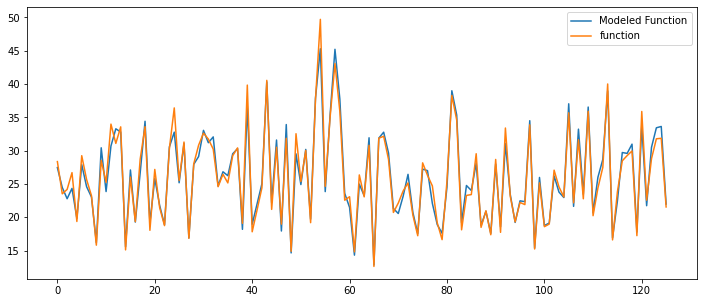

In [47]:
XX = np.dot(X_m.T, X_m)
yy = np.dot(X_m.T,y)

betas = np.linalg.solve(XX,yy)

modeled = np.dot(X_m, betas) # 6 parametre ile

x = range(0,len(X_m))
plt.figure(figsize=(12,5))
plt.plot(x,modeled, label='Modeled Function')
plt.plot(x,y, label='function')
plt.legend()



# 4. Adım

In [48]:
p2_pr = pd.DataFrame({
    'y':p_pr['y'],
    'intercept':np.ones_like(p_pr['y']),
    'f1':p_pr['f1'],
    'f2':p_pr['f2'],
    'f3':p_pr['f3'],
    'f4':p_pr['f4'],
    'f5':p_pr['f1xf1'],
    'f6':p_pr['f1xf2'],
    'f7':p_pr['f1xf3'],
    'f8':p_pr['e_f1xf3'],
    'f9':p_pr['f2xf3'],
    'f10':p_pr['f3xf4'],
})



def learn_linear_lsq_backward(p_frame, p_val_threshold=0.025):
    
    columns = list(p_frame.columns[1:])

    for i in range(len(columns)):

            X_m = p_frame[columns].to_numpy()
            y = p_frame.y

            XX = np.dot(X_m.T, X_m)
            yy = np.dot(X_m.T,y)

            betas = np.linalg.solve(XX,yy)

            residuals = y - np.dot(X_m,betas)
            
            s_2_variance = np.sum(residuals**2)/(np.shape(p_frame)[0]-np.shape(p_frame)[1])

            stdn = np.sqrt(s_2_variance*np.linalg.inv(np.dot(X_m.T,X_m)))

            t_i = (betas-0)/np.diag(stdn)

            p_val = (1.0-t.cdf(abs(t_i),126-11))*2 

            index = np.argmax(p_val)

            print ('Iteration ',i, ' Found largest pvalue for column ', columns[index], ' With value =', p_val[index])

            if (p_val[index]<p_val_threshold):
                ## Finished with training
                break

            ## Remove the column from the model and loop to remove another one
            del columns[index]
    return columns

print ('Columns for precise data ', learn_linear_lsq_backward(p2_pr, p_val_threshold=0.025))
#print ('Columns for noisy data ', learn_linear_lsq_backward(p_lowq, p_val_threshold=0.025))

            

Iteration  0  Found largest pvalue for column  f8  With value = 0.8169118574211529
Iteration  1  Found largest pvalue for column  f5  With value = 0.7179139288262579
Iteration  2  Found largest pvalue for column  f6  With value = 0.5349515994254532
Iteration  3  Found largest pvalue for column  f4  With value = 0.4725315574062148
Iteration  4  Found largest pvalue for column  f10  With value = 0.0021860764432850566
Columns for precise data  ['intercept', 'f1', 'f2', 'f3', 'f7', 'f9', 'f10']


C:\Users\ilyas\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt


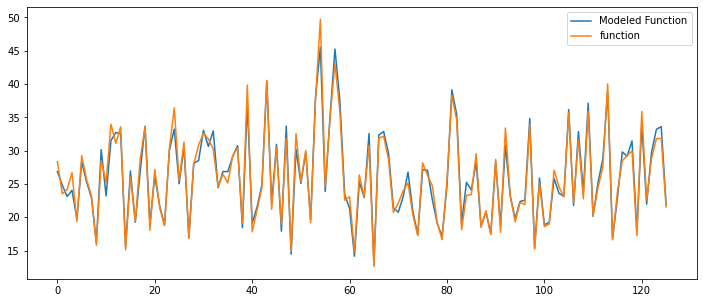

In [49]:
X_m = p2_pr.iloc[:,[1,2,3,4,8,10,11]].to_numpy()
y = p2_pr['y'].to_numpy()

XX = np.dot(X_m.T, X_m)
yy = np.dot(X_m.T,y)

betas = np.linalg.solve(XX,yy)

modeled = np.dot(X_m, betas) # 6 parametre ile

x = range(0,len(X_m))
plt.figure(figsize=(12,5))
plt.plot(x,modeled, label='Modeled Function')
plt.plot(x,y, label='function')
plt.legend()